In [1]:
# Install library for reading JPK File
%pip uninstall jpkreader --yes
%pip install git+https://github.com/jlopezalo/pyjpkreader

Found existing installation: jpkreader 0.0.1
Uninstalling jpkreader-0.0.1:
  Successfully uninstalled jpkreader-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyjpkreader to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-mm2bimal
  Running command git clone -q https://github.com/jlopezalo/pyjpkreader /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-mm2bimal
  Created wheel for jpkreader: filename=jpkreader-0.0.1-py3-none-any.whl size=10194 sha256=f28433ddaaa59cd0131bd51136da567de8f70d4d97226865c78d5a20b96417eb
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-rkst7w5l/wheels/23/c0/8e/c378f28c65b0199f6092b6aa45e090c1ed6b4093f3adb03a15
Successfully built jpkreader
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install library for AFM data Rheology Analysis
%pip uninstall pyafmrheo --yes
%pip install git+https://github.com/jlopezalo/pyafmrheo.git

Found existing installation: pyafmrheo 0.0.1
Uninstalling pyafmrheo-0.0.1:
  Successfully uninstalled pyafmrheo-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmrheo.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-t0pj098n
  Running command git clone -q https://github.com/jlopezalo/pyafmrheo.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-t0pj098n
  Created wheel for pyafmrheo: filename=pyafmrheo-0.0.1-py3-none-any.whl size=23324 sha256=98941ead6b4ef4d25a540662b9dd391f29d298d01087000ea5d32db5819f48d1
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-_o6djq8o/wheels/fb/66/18/3e93b45c845b0d7b83ded1e127a1c127820d070ce5b71dece4
Successfully built pyafmrheo
Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gmean

from pyafmrheo.routines.PiezoCharacterization import doPiezoCharacterization
from pyafmrheo.routines.ViscousDragSteps import doViscousDragSteps
from pyafmrheo.routines.Microrheology import doMicrorheologyAnalysis

plt.rcParams["figure.figsize"] = (20,10)

In [4]:
piezo_char_dataset = '/Users/javierlopez/Desktop/Data/javistuff/Gels-15122021/HeadPiezo/Calibration/'
viscous_drag_dataset = '/Users/javierlopez/Desktop/Gels-16122021/AGAROSE1/vDrag/'
microrheology_dataset = '/Users/javierlopez/Desktop/Gels-16122021/AGAROSE1/HeadRheo/'

In [5]:
def getFileList(directory):
    types = ('*.jpk-force', '*.jpk-force-map') # the tuple of file types
    dataset_files = []
    for files in types:
        dataset_files.extend(glob.glob(directory + '**/' + files, recursive=True)) 
    return dataset_files

# Piezo Characterization

In [6]:
piezo_char_files = getFileList(piezo_char_dataset)
piezo_char_results = []
for file_path in piezo_char_files:
    file_result = doPiezoCharacterization(file_path)
    piezo_char_results.append(file_result)
piezo_char_results_df = pd.concat(piezo_char_results, ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 do

In [7]:
piezo_char_results_df

,file_id,curve_idx,frequency,fi_degrees,amp_quotient,inVols
0,16.01.12.714,0,0.6,-0.236502,0.979659,1.297318e-08
1,16.01.12.714,0,1.0,-0.040625,0.981266,1.297318e-08
2,16.01.12.714,0,10.0,0.276227,0.992141,1.297318e-08
3,16.01.12.714,0,60.0,1.475273,0.982223,1.297318e-08
4,16.01.12.714,0,120.0,2.489659,1.005135,1.297318e-08
...,...,...,...,...,...,...
184,16.04.38.920,0,120.0,2.593343,1.002152,1.297318e-08
185,16.04.38.920,0,200.0,3.245723,1.193289,1.297318e-08
186,16.04.38.920,0,800.0,16.494070,0.839759,1.297318e-08
187,16.04.38.920,0,1200.0,27.316253,0.705589,1.297318e-08


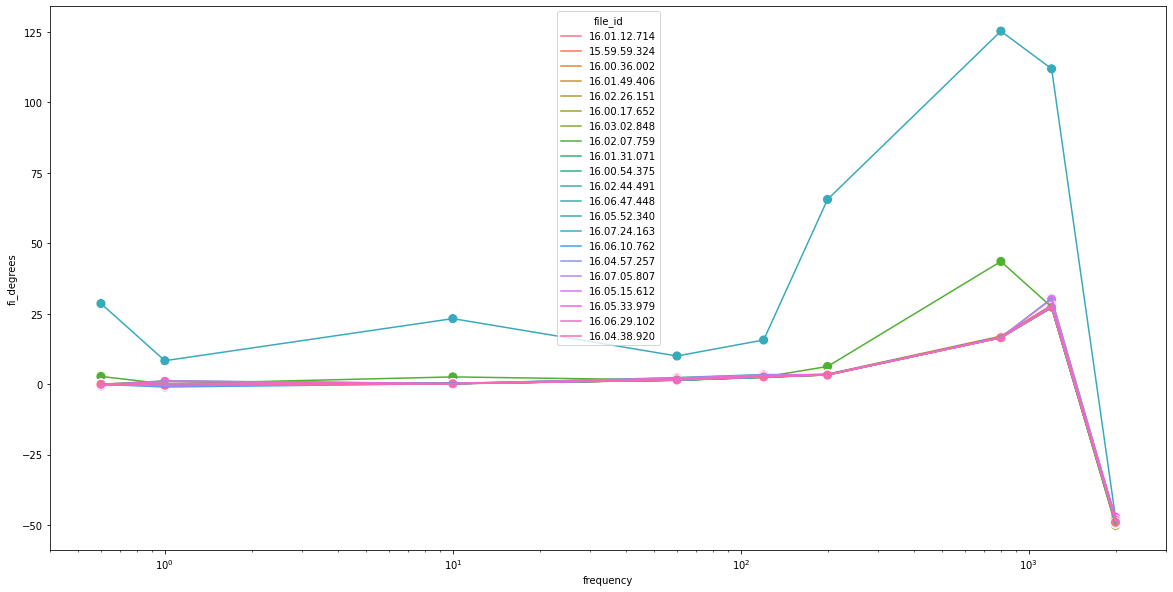

In [112]:
sns.lineplot(data=piezo_char_results_df, x="frequency", y="fi_degrees", hue="file_id")
sns.scatterplot(data=piezo_char_results_df, x="frequency", y="fi_degrees", hue="file_id", s=100, legend=False)
plt.xscale('log')
plt.show()

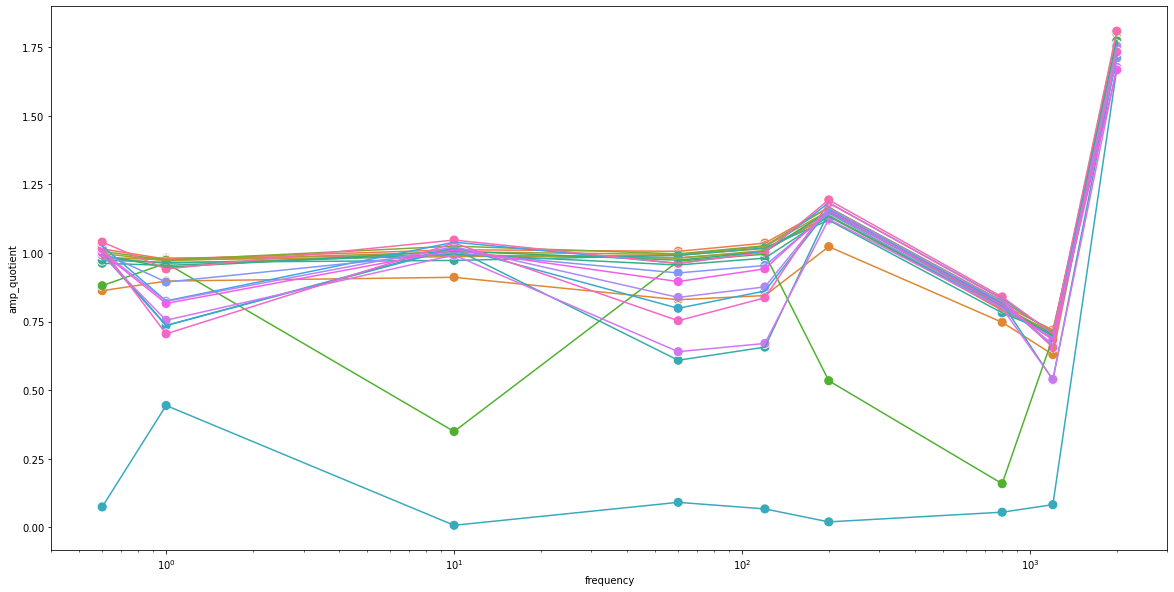

In [113]:
sns.lineplot(data=piezo_char_results_df, x="frequency", y="amp_quotient", hue="file_id", legend=False)
sns.scatterplot(data=piezo_char_results_df, x="frequency", y="amp_quotient", hue="file_id", s=100, legend=False)
plt.xscale('log')
plt.show()

In [10]:
grouped_piezo_char_results = piezo_char_results_df.groupby(['frequency'], as_index=False).median()

In [11]:
grouped_piezo_char_results

,frequency,curve_idx,fi_degrees,amp_quotient,inVols
0,0.6,0,-0.034912,0.995682,1.297318e-08
1,1.0,0,0.065326,0.941708,1.297318e-08
2,10.0,0,0.218081,1.003958,1.297318e-08
3,60.0,0,1.509214,0.961819,1.297318e-08
4,120.0,0,2.595234,0.995583,1.297318e-08
5,200.0,0,3.349860,1.149662,1.297318e-08
6,800.0,0,16.621041,0.804354,1.297318e-08
7,1200.0,0,27.403245,0.692277,1.297318e-08
8,2000.0,0,-49.102900,1.756440,1.297318e-08


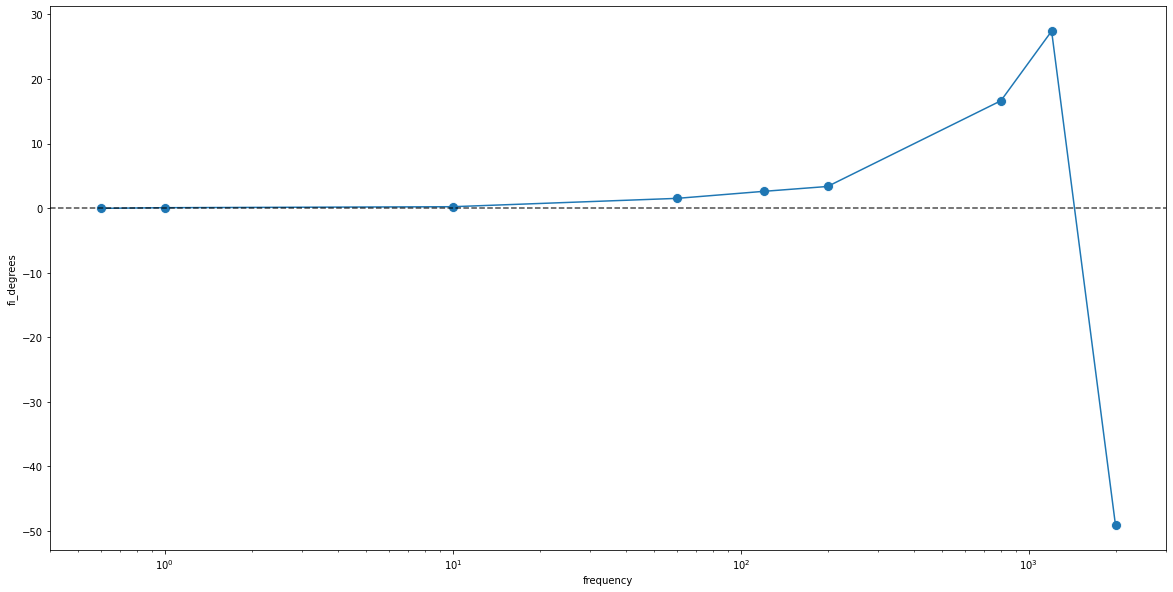

In [118]:
sns.lineplot(data=grouped_piezo_char_results, x="frequency", y="fi_degrees")
sns.scatterplot(data=grouped_piezo_char_results, x="frequency", y="fi_degrees", s=100, legend=False)
plt.xscale('log')
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.show()

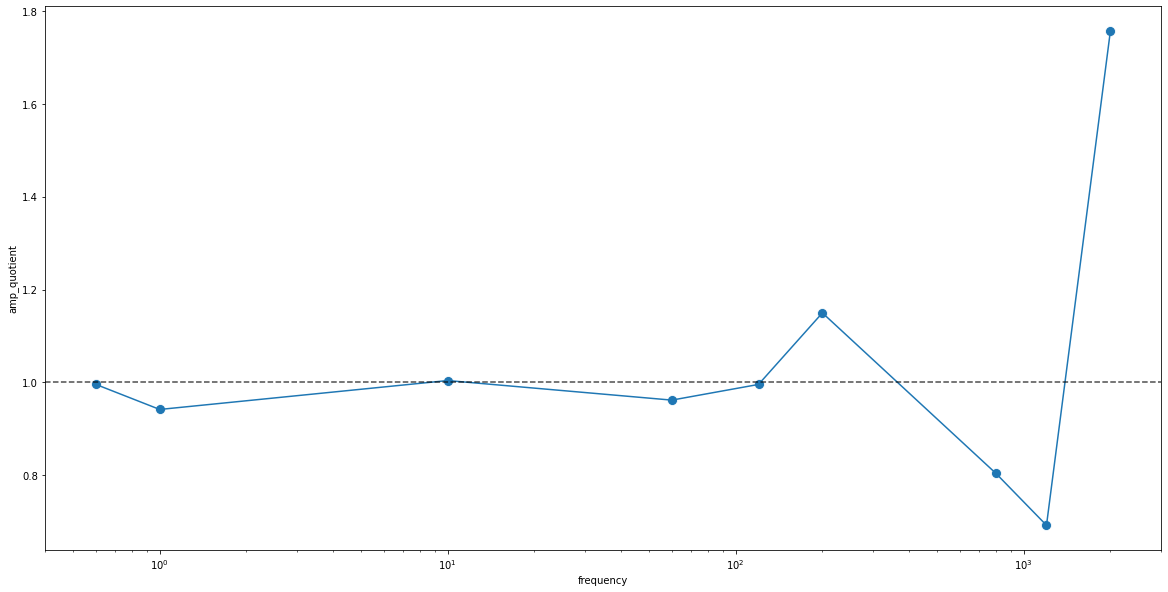

In [120]:
sns.lineplot(data=grouped_piezo_char_results, x="frequency", y="amp_quotient")
sns.scatterplot(data=grouped_piezo_char_results, x="frequency", y="amp_quotient", s=100, legend=False)

plt.xscale('log')
plt.axhline(1, color="black", linestyle="--", alpha=0.7)
plt.show()

# Viscous Drag

In [121]:
vdrag_files = getFileList(viscous_drag_dataset)
vdrag_results = []
for file_path in vdrag_files:
    file_result = doViscousDragSteps(file_path, piezoCharData=grouped_piezo_char_results)
    vdrag_results.append(file_result)
vdrag_results_df = pd.concat(vdrag_results, ignore_index=True)

Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '



5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '



5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.7

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo c

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
Found Distances:
5.000000000000001e-07 1.0000000000000002e-06 1.5e-06 2.0000000000000003e-06 2.5e-06 3e-06
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0
The frequency 500.0 was not found in the piezo characterization dataframe
The frequency found at index 499.9177766814669 d

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 499.9177766814669 does not match with the frequency applied 500.0


In [122]:
vdrag_results_df

,file_id,curve_idx,seg_id,distance,frequency,Bh,Hd,fi,amp_quotient,inVols,k
0,20.01.50.226,0,3,5.000000e-07,800.0,4.824364e-07,-0.001003+0.002425j,16.621041,0.804354,7.840027e-09,0.101
1,20.01.50.226,0,5,1.000000e-06,800.0,3.731372e-07,-0.001710+0.001876j,16.621041,0.804354,7.840027e-09,0.101
2,20.01.50.226,0,7,1.500000e-06,800.0,3.865841e-07,-0.001709+0.001943j,16.621041,0.804354,7.840027e-09,0.101
3,20.01.50.226,0,9,2.000000e-06,800.0,3.917439e-07,-0.001729+0.001969j,16.621041,0.804354,7.840027e-09,0.101
4,20.01.50.226,0,11,2.500000e-06,800.0,3.957288e-07,-0.001737+0.001989j,16.621041,0.804354,7.840027e-09,0.101
...,...,...,...,...,...,...,...,...,...,...,...
379,20.07.19.893,15,5,1.000000e-06,500.0,7.520751e-07,0.000693+0.002363j,0.000000,1.000000,7.840027e-09,0.101
380,20.07.19.893,15,7,1.500000e-06,500.0,7.449829e-07,0.000667+0.002340j,0.000000,1.000000,7.840027e-09,0.101
381,20.07.19.893,15,9,2.000000e-06,500.0,7.759045e-07,0.000658+0.002438j,0.000000,1.000000,7.840027e-09,0.101
382,20.07.19.893,15,11,2.500000e-06,500.0,7.580670e-07,0.000605+0.002382j,0.000000,1.000000,7.840027e-09,0.101


In [123]:
vdrag_results_df.describe()

,curve_idx,distance,frequency,Bh,Hd,fi,amp_quotient,inVols,k
count,384.000000,3.840000e+02,384.000000,3.840000e+02,384.00000+0.00000j,384.000000,384.000000,3.840000e+02,3.840000e+02
mean,7.500000,1.750000e-06,650.000000,5.600913e-07,-0.000505+0.002139j,8.310520,0.902177,7.840027e-09,1.010000e-01
std,4.615786,8.550266e-07,150.195695,2.254419e-07,0.001424+0.000000j,8.321363,0.097951,7.619990e-23,3.612932e-16
min,0.000000,5.000000e-07,500.000000,-1.455514e-06,-0.003335+0.003354j,0.000000,0.804354,7.840027e-09,1.010000e-01
25%,3.750000,1.000000e-06,500.000000,3.954962e-07,-0.001739+0.001943j,0.000000,0.804354,7.840027e-09,1.010000e-01
50%,7.500000,1.750000e-06,650.000000,4.979863e-07,-0.000145+0.002481j,8.310520,0.902177,7.840027e-09,1.010000e-01
75%,11.250000,2.500000e-06,800.000000,7.621388e-07,0.000620+0.002402j,16.621041,1.000000,7.840027e-09,1.010000e-01
max,15.000000,3.000000e-06,800.000000,7.805879e-07,0.007763-0.002462j,16.621041,1.000000,7.840027e-09,1.010000e-01


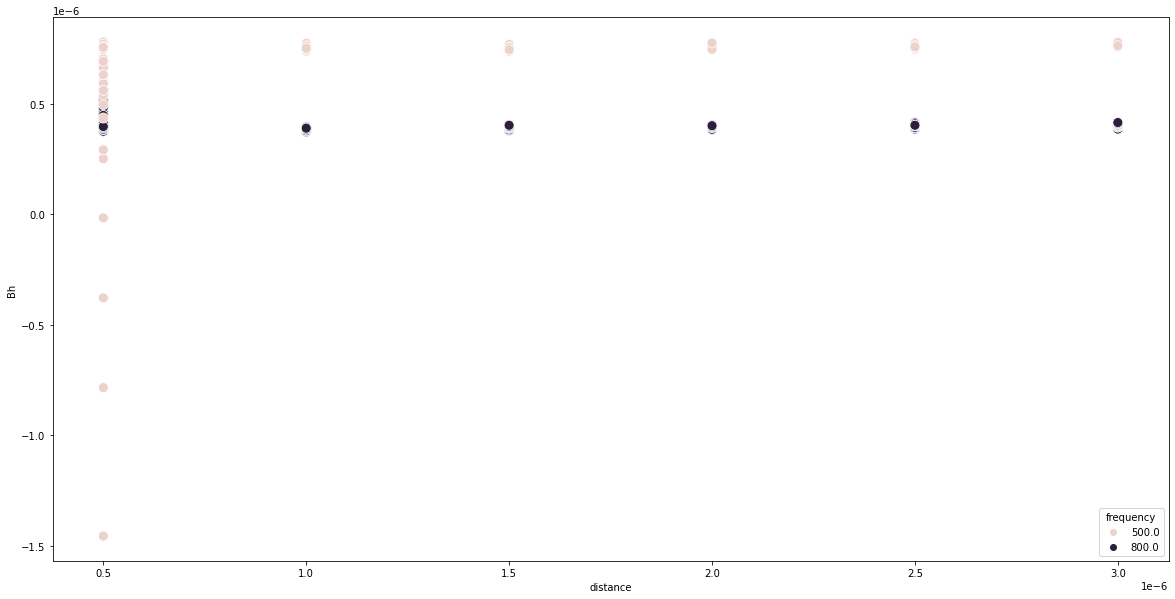

In [124]:
sns.scatterplot(data=vdrag_results_df, x="distance", y="Bh", hue="frequency", s=100)
plt.show()

In [125]:
# grouped_vdrag_results = vdrag_results_df.groupby(['distance'], as_index=False).mean()
grouped_vdrag_results = vdrag_results_df.groupby(['distance'], as_index=False).median()

In [126]:
grouped_vdrag_results

,distance,curve_idx,frequency,Bh,fi,amp_quotient,inVols,k
0,5.000000e-07,7.5,650.0,4.979863e-07,8.31052,0.902177,7.840027e-09,0.101
1,1.000000e-06,7.5,650.0,5.674859e-07,8.31052,0.902177,7.840027e-09,0.101
2,1.500000e-06,7.5,650.0,5.711489e-07,8.31052,0.902177,7.840027e-09,0.101
3,2.000000e-06,7.5,650.0,5.760877e-07,8.31052,0.902177,7.840027e-09,0.101
4,2.500000e-06,7.5,650.0,5.815770e-07,8.31052,0.902177,7.840027e-09,0.101
5,3.000000e-06,7.5,650.0,5.863946e-07,8.31052,0.902177,7.840027e-09,0.101


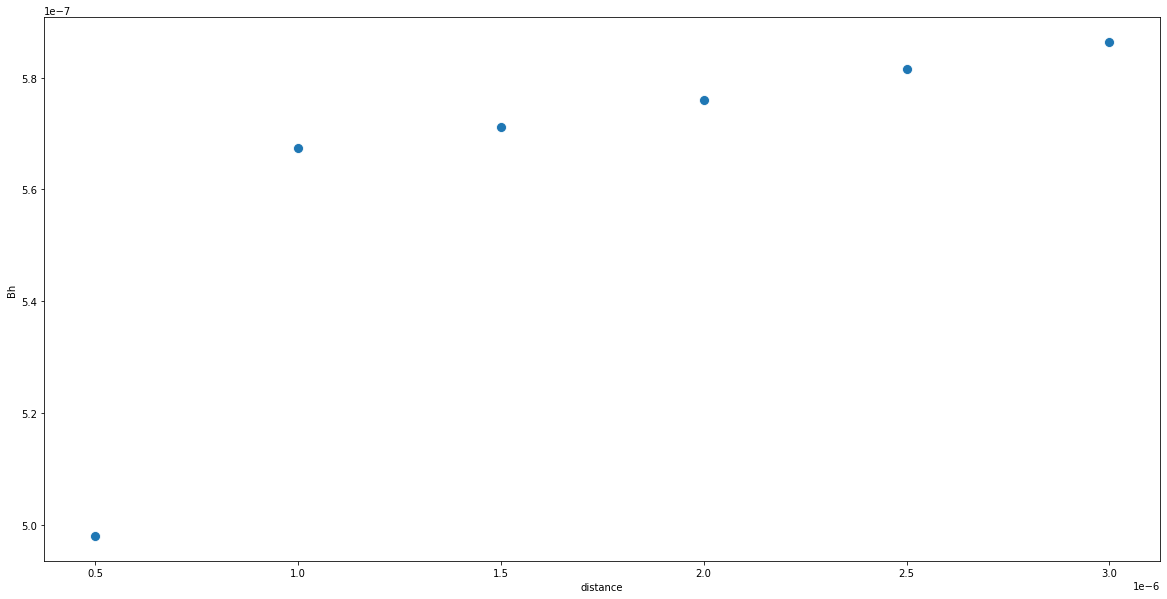

In [127]:
sns.scatterplot(data=grouped_vdrag_results, x="distance", y="Bh", s=100)
plt.show()

# Microrheology

In [45]:
# Define parameters for data analysis
poc_win_size = 50
indenter_shape = 'paraboloid'
tip_parameter = 75 * 1e-9

In [89]:
microrheo_files = getFileList(microrheology_dataset)
microrheo_results = []
for file_path in microrheo_files:
    file_result = doMicrorheologyAnalysis(file_path, poc_win_size, indenter_shape, tip_parameter, bcoef=5.7 * 1e-7, piezoCharData=grouped_piezo_char_results)
    # file_result = doMicrorheologyAnalysis(file_path, poc_win_size, indenter_shape, tip_parameter, bcoef=5.7 * 1e-7, piezoCharData=None)
    microrheo_results.append(file_result)
microrheo_results_df = pd.concat(microrheo_results, ignore_index=True)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.984214680347

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/

The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.9944475291504

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-pac

Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0'

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0
Hertz parameter names: ['delta0', 'E0', 'f0', 'slope']
Hertz independent variables: ['indentation']
The frequency found at index 799.78952907129

/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


In [90]:
microrheo_results_df

,file_id,curve_idx,seg_id,indenter_shape,hertz_E,tip_parameter,frequency,G_storage,G_loss,loss_tan,fi,amp_quotient,inVols,k
0,19.14.46.893,0,2,paraboloid,9562.953091,7.500000e-08,2000.0,-72481.323941,79534.786840,-1.097314,0.218081,1.003958,7.840027e-09,0.101
1,19.14.46.893,0,3,paraboloid,9562.953091,7.500000e-08,1.0,15186.766167,457.824008,0.030146,0.218081,1.003958,7.840027e-09,0.101
2,19.14.46.893,0,4,paraboloid,9562.953091,7.500000e-08,60.0,13633.982922,-2104.581052,-0.154363,0.218081,1.003958,7.840027e-09,0.101
3,19.14.46.893,0,5,paraboloid,9562.953091,7.500000e-08,120.0,11466.675807,-999.577732,-0.087172,0.218081,1.003958,7.840027e-09,0.101
4,19.14.46.893,0,6,paraboloid,9562.953091,7.500000e-08,1200.0,9304.230465,60324.928894,6.483602,0.218081,1.003958,7.840027e-09,0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,19.20.03.136,15,6,paraboloid,33392.591055,7.500000e-08,1200.0,27299.745481,48627.716930,1.781252,0.218081,1.003958,7.840027e-09,0.101
1148,19.20.03.136,15,7,paraboloid,33392.591055,7.500000e-08,0.6,13072.338898,416.100889,0.031831,0.218081,1.003958,7.840027e-09,0.101
1149,19.20.03.136,15,8,paraboloid,33392.591055,7.500000e-08,200.0,7600.862568,624.281611,0.082133,0.218081,1.003958,7.840027e-09,0.101
1150,19.20.03.136,15,9,paraboloid,33392.591055,7.500000e-08,10.0,13633.955761,-301.955822,-0.022147,0.218081,1.003958,7.840027e-09,0.101


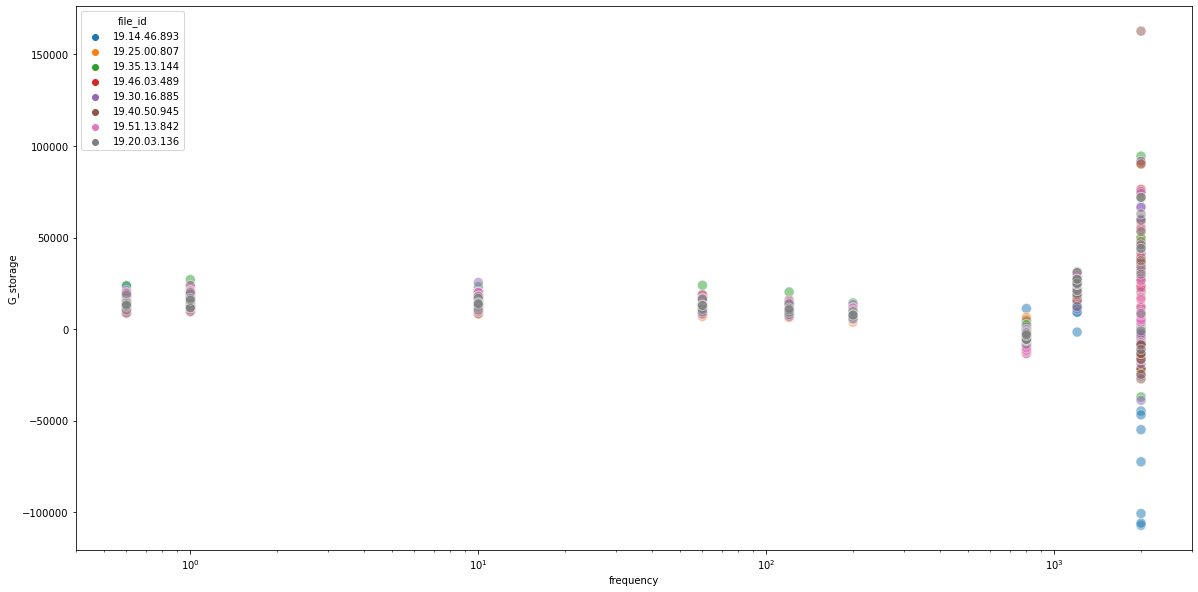

In [130]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="G_storage", hue="file_id", s=100, alpha=0.5)
plt.xscale('log')
plt.show()

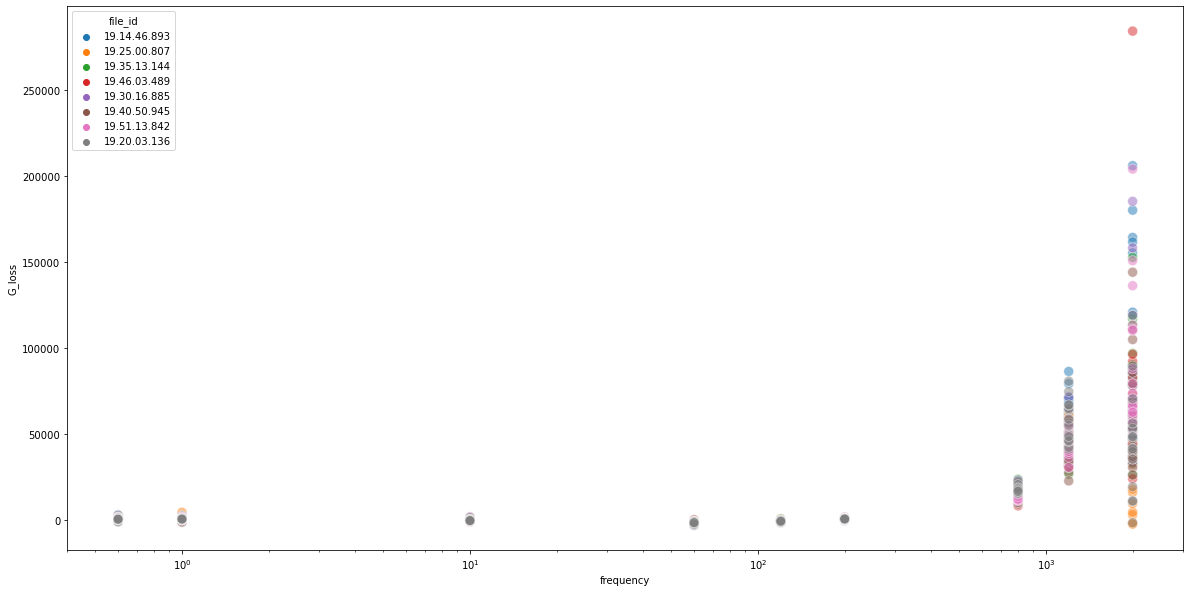

In [128]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="G_loss", hue="file_id", s=100, alpha=0.5)
plt.xscale('log')
plt.show()

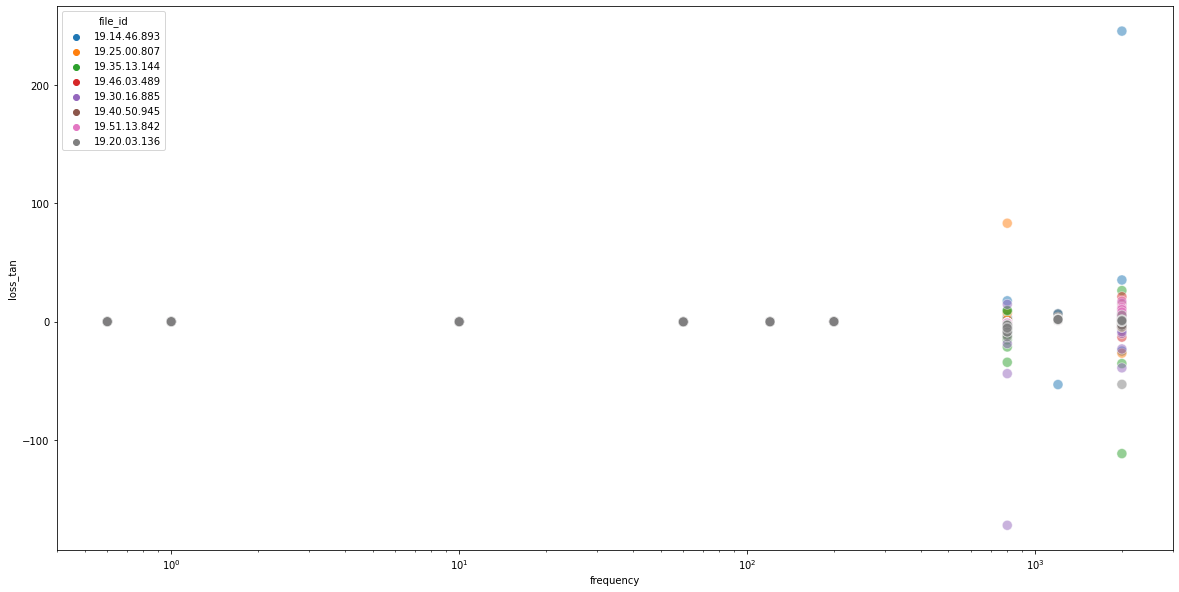

In [129]:
sns.scatterplot(data=microrheo_results_df, x="frequency", y="loss_tan", hue="file_id", s=100, alpha=0.5)
plt.xscale('log')
plt.show()

In [94]:
microrheo_results_results = microrheo_results_df.groupby(['frequency'], as_index=False).median()

In [131]:
# Generate a data copy without negative values before computing gmean
data_for_gmean = microrheo_results_df.drop(microrheo_results_df[(microrheo_results_df['G_storage'] <= 0) | (microrheo_results_df['G_loss'] <= 0)].index, inplace=False)

# Compute geomean of G* and G**
microrheo_results_results = data_for_gmean.groupby(['frequency'], as_index=False).agg({'G_storage':gmean, 'G_loss':gmean}).reset_index()

microrheo_results_results["loss_tan"] = microrheo_results_results["G_loss"] / microrheo_results_results["G_storage"] 

In [132]:
microrheo_results_results

,index,frequency,G_storage,G_loss,loss_tan
0,0,0.6,13982.871677,670.104481,0.047923
1,1,1.0,14605.680028,671.147910,0.045951
2,2,10.0,12751.623867,323.360676,0.025358
3,3,60.0,10415.682898,96.384745,0.009254
4,4,120.0,8231.138740,216.612110,0.026316
5,5,200.0,7857.900099,588.267895,0.074863
6,6,800.0,2221.270909,16041.847491,7.221923
7,7,1200.0,22453.656976,45349.088656,2.019675
8,8,2000.0,26257.042524,61202.878366,2.330913


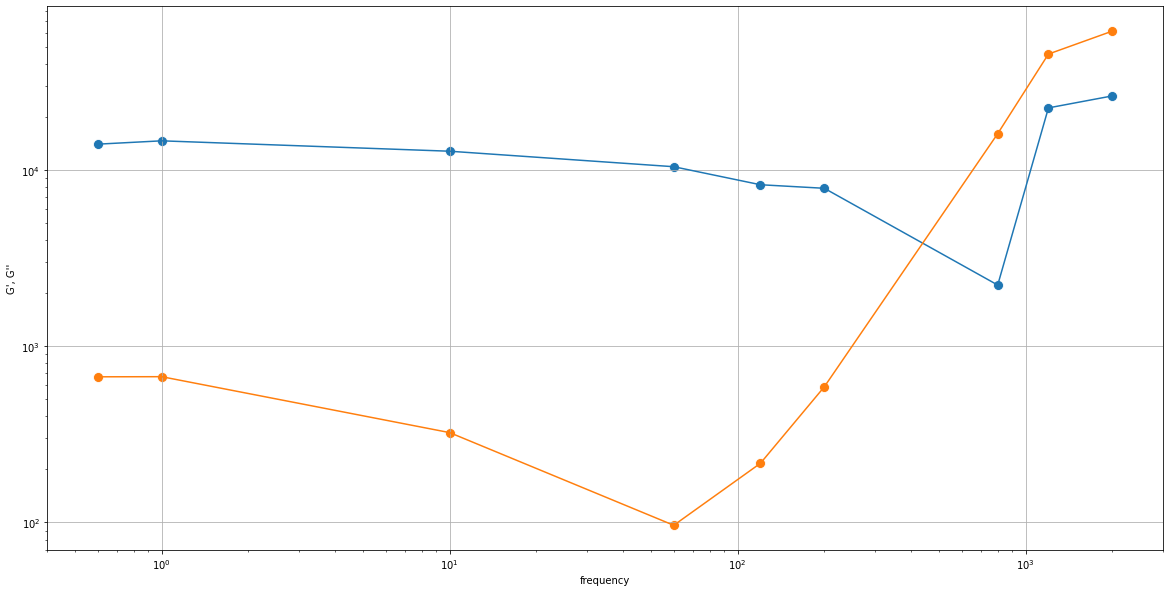

In [101]:
sns.scatterplot(data=microrheo_results_results, x="frequency", y="G_storage", s=100)
sns.lineplot(data=microrheo_results_results, x="frequency", y="G_storage")
sns.scatterplot(data=microrheo_results_results, x="frequency", y="G_loss", s=100)
sns.lineplot(data=microrheo_results_results, x="frequency", y="G_loss")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("G', G''")
plt.grid()
plt.show()

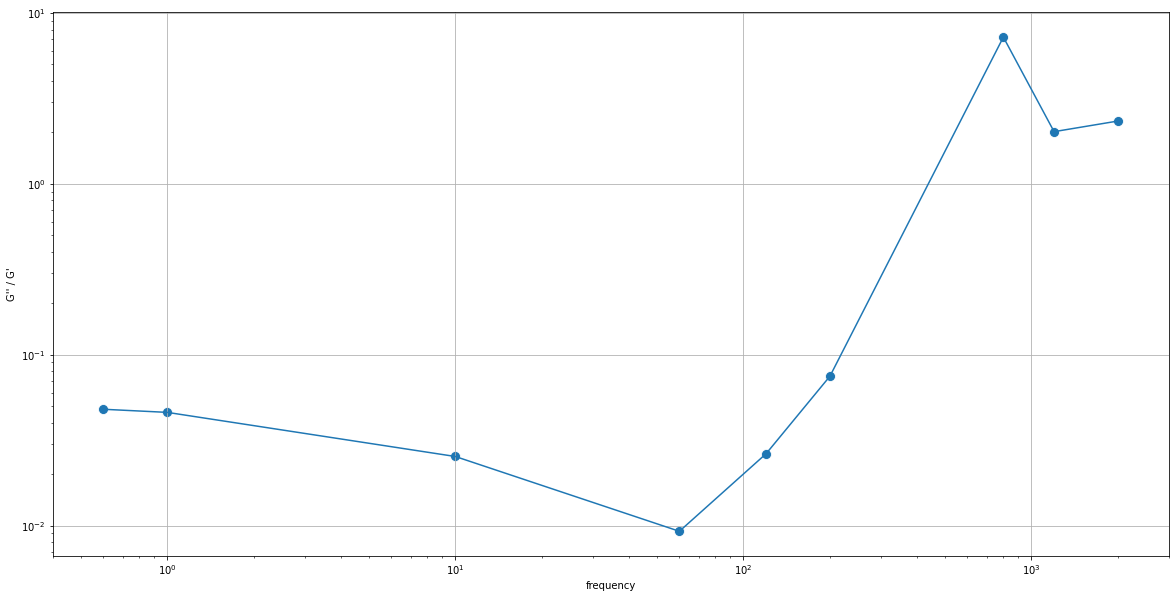

In [133]:
sns.scatterplot(data=microrheo_results_results, x="frequency", y="loss_tan", s=100)
sns.lineplot(data=microrheo_results_results, x="frequency", y="loss_tan")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("G'' / G'")
plt.grid()
plt.show()